TASK-1

In [53]:

#importing the required modules

 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

 


from matplotlib import pyplot
from keras.datasets import cifar10
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image


# #loading the cifar10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# shape of the dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


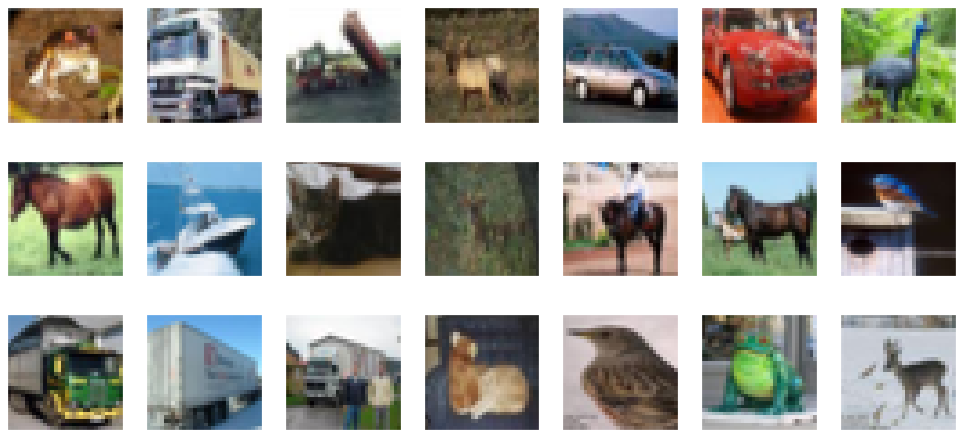

In [54]:
#Plotting the dataset
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
       
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [55]:
#Converting higher dimensional datset to a lower dimensioanl dataset from colour to grayscale
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train],dtype = np.uint8)
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test],dtype = np.uint8)

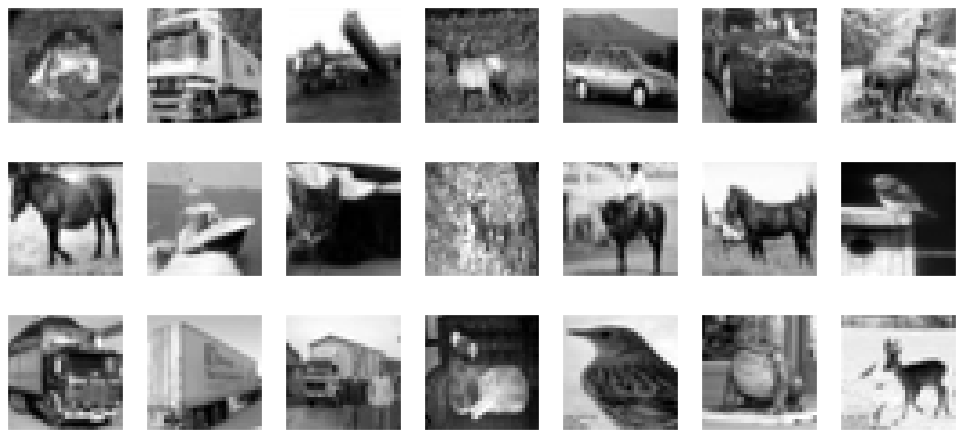

In [56]:
#plotting the grayscale images
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

Afterwards, we also need to normalize array values. We know that by default the brightness of each pixel in any image are represented using a value which ranges between 0 and 255. In order for neural network to work best, we need to convert this value such that it’s going to be in the range between 0 and 1. And it’s actually pretty simple to do so:

In [57]:
#Normalasing the data by dividing it with 255.0(as pixel range from 0-255)
X_train  = X_train/255.0
X_test  = X_test/255.0


In [58]:
print(X_test.shape)
print(X_train.shape)

(10000, 32, 32)
(50000, 32, 32)


In [59]:
X_test=X_test.reshape(10000,1024)
print(X_test.shape)
X_train=X_train.reshape(50000,1024)
print(X_train.shape)

(10000, 1024)
(50000, 1024)


In [60]:
#Loading the required modules

#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] 
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean')
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) 
     
    #Repeating the above steps for a defined number of iterations
  
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster to which it belongs
            centr = x[points==idx].mean(axis=0) 
            centroids.append(centr)
 
        centroids = np.vstack(centroids) #Updating the new Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        datapoints = np.array([np.argmin(i) for i in distances])
         
    return datapoints 
 



#Applying our function
label = kmeans(X_test,10,85)
 


In [61]:
pip install validclust

In [62]:
#calculating dunns value
from sklearn.metrics import pairwise_distances
from validclust import dunn
dist = pairwise_distances(X_test)
print("Dunns Index = ",dunn(dist, label))

Dunns Index =  0.0855750636327308


In [63]:
#ASC average silhoutte score
print("ASC value = ",silhouette_score(X_test, label, metric='euclidean'))


ASC value =  0.06443815312188773


TASK-2

In [70]:
encoding_dim =256
input_dataset = Input(shape=(1024,),name="INPUT")


 # encoded representation of input
encoded = Dense(encoding_dim, activation='relu',name="encoded")(input_dataset)


 # decoded representation of code 
decoded = Dense(1024, activation='sigmoid',name='decoded')(encoded)
 # Model which take input image and shows decoded images
autoencoder = Model(input_dataset, decoded) 

In [71]:
# This model shows encoded images
encoder = Model(input_dataset, encoded)
 # Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
 # last layer of the autoencoder model

decoder_layer = autoencoder.layers[-1]
 # decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input)) 


In [72]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [73]:
autoencoder.fit(X_train, X_train,
                 epochs=15,
                 batch_size=256
                 )


Epoch 1/15
196/196 [==============================] - 5s 25ms/step - loss: 0.6359
Epoch 2/15
196/196 [==============================] - 5s 25ms/step - loss: 0.6029
Epoch 3/15
196/196 [==============================] - 5s 24ms/step - loss: 0.5908
Epoch 4/15
196/196 [==============================] - 5s 24ms/step - loss: 0.5862
Epoch 5/15
196/196 [==============================] - 5s 25ms/step - loss: 0.5840
Epoch 6/15
196/196 [==============================] - 5s 24ms/step - loss: 0.5827
Epoch 7/15
196/196 [==============================] - 5s 24ms/step - loss: 0.5813
Epoch 8/15
196/196 [==============================] - 5s 24ms/step - loss: 0.5806
Epoch 9/15
196/196 [==============================] - 5s 25ms/step - loss: 0.5796
Epoch 10/15
196/196 [==============================] - 5s 25ms/step - loss: 0.5787
Epoch 11/15
196/196 [==============================] - 5s 25ms/step - loss: 0.5783
Epoch 12/15
196/196 [==============================] - 5s 25ms/step - loss: 0.5777
Epoch 13/15
1

In [74]:
encoded_img = encoder.predict(X_train)
decoded_img = decoder.predict(encoded_img) 

In [75]:
encoded_img.shape

(50000, 256)

In [76]:
#function to plot the images
def show_data(X, n=10, height=32, width=32, title=""):
    plt.figure(figsize=(10, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

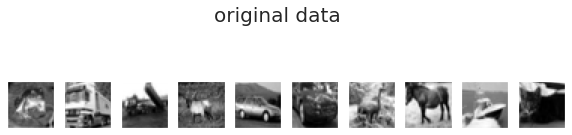

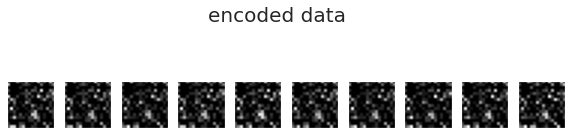

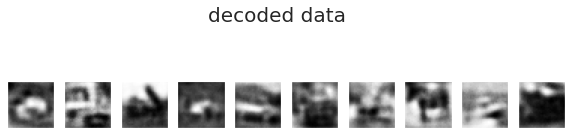

In [77]:
show_data(X_train, title="original data")
show_data(encoded_img, height=16, width=16, title="encoded data")
show_data(decoded_img, title="decoded data")

In [78]:
#KMeans clustering on the encoded data
kmeans = KMeans(n_clusters=10)
kmeans.fit(encoded_img)
y_kmeans = kmeans.predict(encoded_img)
#ASC average silhouette score
print("ASC value = ",silhouette_score(encoded_img, y_kmeans, metric='euclidean'))

ASC value =  0.09196129
